In [7]:
import pandas as pd

df1 = pd.read_csv('/content/drive/MyDrive/FIAP/Machine Learning/Checkpoint/2º Semestre/DT, RF, LDA, QDA, GridSearch/CardioGoodFitness.csv')
df2 = pd.read_csv('/content/drive/MyDrive/FIAP/Machine Learning/Checkpoint/2º Semestre/DT, RF, LDA, QDA, GridSearch/AirlineReviews.csv')


In [9]:
df1.head(2)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [12]:

df1.isna().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


In [29]:
# II. Devem ser criadas 3 faixas de idade do cliente, a partir da coluna Age, sendo que cada faixa deve ter aproximadamente 33% dos registros totais.

df1 = df1.sort_values(by='Age').reset_index(drop=True)
limits = []
limit = None
last_position = None
changed = None
offset = int(len(df1)/3)

for position, value in enumerate(df1['Age']):
  if position >= offset:
    changed = True

  if limit != value:
    if changed:
      if offset - last_position <= position - offset:
        limits.append(last_position - 1)
      else:
        limits.append(position - 1)
      offset += int(len(df1)/3)
      changed = False
    else:
      last_position = position
    limit = value

threshold_1 = df1['Age'].loc[limits[0]]
threshold_2 = df1['Age'].loc[limits[1]]
df1['faixa_etaria'] = df1['Age'].apply(lambda x: 0 if x <= threshold_1 else (1 if x <= threshold_2 else 2))
df1['faixa_etaria'].value_counts()


,count
faixa_etaria,
1,66
2,60
0,54


In [31]:
print(df1['Product'].unique())


['TM195' 'TM498' 'TM798']


In [35]:
df1['Sexo'] = df1['Gender'].apply(lambda x: 1 if x == "Female" else 0)
df1['Civil'] = df1['MaritalStatus'].apply(lambda x: 1 if x == "Partnered" else 0)
df1['TM195'] = df1['Product'].apply(lambda x: 1 if x == 'TM195' else 0)
df1['TM498'] = df1['Product'].apply(lambda x: 1 if x == 'TM498' else 0)
df1['TM798'] = df1['Product'].apply(lambda x: 1 if x == 'TM798' else 0)
df1.head(5)
print(df1['TM195'].value_counts())
print(df1['TM498'].value_counts())
print(df1['TM798'].value_counts())
print(df1['Sexo'].value_counts())
print(df1['Civil'].value_counts())

TM195
0    100
1     80
Name: count, dtype: int64
TM498
0    120
1     60
Name: count, dtype: int64
TM798
0    140
1     40
Name: count, dtype: int64
Sexo
0    104
1     76
Name: count, dtype: int64
Civil
1    107
0     73
Name: count, dtype: int64


In [36]:
df1.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'faixa_etaria', 'Sexo', 'Civil', 'TM195',
       'TM498', 'TM798'],
      dtype='object')

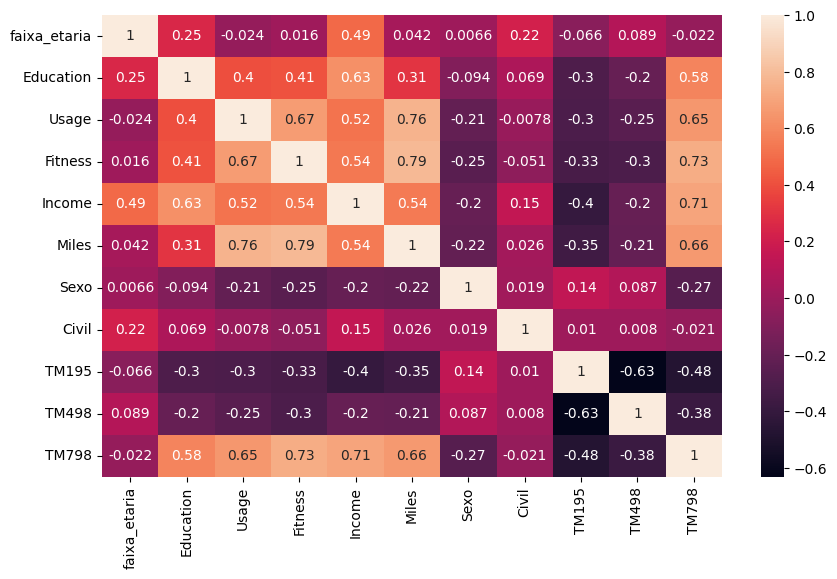

In [45]:
# VI. Calcule e exiba a matriz de correlação deste dataset. A partir dessa matriz, opine que variáveis poderiam ser omitidas na criação do modelo sem que a acurácia fosse essencialmente prejudicada?

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Separar os dados em treinamento e teste
x = df1[['Education', 'Usage','Fitness', 'Income', 'Miles', 'Sexo', 'Civil', 'TM195','TM498', 'TM798']]
y = df1['faixa_etaria']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Escalonar os dados para LDA e QDA
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

plt.figure(figsize=(10, 6))
sns.heatmap(df1[['faixa_etaria', 'Education', 'Usage','Fitness', 'Income', 'Miles', 'Sexo', 'Civil', 'TM195','TM498', 'TM798']].corr(), annot=True)
plt.show()



In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix

# --- Árvore de Decisão ---

def dt_best(x_train, y_train, x_test, y_test):
  criterios_arvore = ['gini', 'log_loss']
  accuracies_arvore = ['gini', 'log_loss']
  max_depth_values = [5, 10, 20]
  min_samples_leaves = [2, 10, 20]
  dt_best = {'criterion':'', 'acuracia':0, 'max_depth':0, 'min_samples_leaf':0}

  for criterio in criterios_arvore:
    for depth in max_depth_values:
      for sample_leaf in min_samples_leaves:
        r = DecisionTreeClassifier(random_state=42, criterion=criterio, min_samples_leaf=sample_leaf, max_depth=depth)
        r.fit(x_train, y_train)
        y_pred = r.predict(x_test)
        acuracia = accuracy_score(y_test, y_pred)

        if acuracia > dt_best['acuracia']:
          dt_best['acuracia'] = acuracia
          dt_best['max_depth'] = depth
          dt_best['min_samples_leaf'] = sample_leaf
          dt_best['criterion'] = criterio
  return dt_best

In [80]:
# --- Floresta Aleatória ---

def rf_best(x_train, y_train, x_test, y_test):
  n_estimators = [10, 30, 50]
  criterios_floresta = ['gini', 'log_loss']
  depths = [5, 10, 20]
  sample_leaves = [2, 10, 20]
  rf_best = {'criterion':'', 'acuracia':0, 'n_estimators':0, 'max_depth':0, 'min_samples_leaf':0}

  for criterio in criterios_floresta:
    for n_estimator in n_estimators:
      for depth in depths:
        for sample_leaf in sample_leaves:
          r = RandomForestClassifier(criterion=criterio,
                                              min_samples_leaf=sample_leaf,
                                              max_depth=depth,
                                              n_estimators=n_estimator,
                                              random_state=42)
          r.fit(x_train, y_train)
          y_pred = r.predict(x_test)
          acuracia = accuracy_score(y_test, y_pred)

          if rf_best['acuracia'] < acuracia:
            rf_best['acuracia'] = acuracia
            rf_best['max_depth'] = depth
            rf_best['n_estimators'] = n_estimator
            rf_best['min_sample_leaf'] = sample_leaf
            rf_best['criterion'] = criterio
  return rf_best

In [84]:
# QDA and LDA
def lda_best(x_train_scaled, y_train, x_test_scaled, y_test):
  models_lda_qda = [
      ('svd', LinearDiscriminantAnalysis(n_components=1, solver='svd')),
      ('lsqr', LinearDiscriminantAnalysis(n_components=1, solver='lsqr', shrinkage=0)),
      ('lsqr-shrinkage', LinearDiscriminantAnalysis(n_components=1, solver='lsqr', shrinkage=1)),
      ('qda', QuadraticDiscriminantAnalysis()),
  ]

  best = {'type':'', 'acuracia':0}
  melhor_modelo_lda = None
  melhor_acuracia_lda = 0

  for name, model in models_lda_qda:
      model.fit(x_train_scaled, y_train)
      y_pred = model.predict(x_test_scaled)
      acuracia = accuracy_score(y_test, y_pred)
      if acuracia > best['acuracia']:
        best['acuracia'] = acuracia
        best['type'] = name
  return best

In [85]:
# III. O modelo preditivo deve ser DT, RF, LDA ou QDA. Determine o melhor modelo utilizando como critério a acurácia. Considere as seguintes faixas de hiperparâmetros:
# Resposta: O modelo escolhido é DT. Possui a mesma acurácia que RF. Contudo, trata-se de um algoritmo mais simples que um DT.

print(dt_best(x_train, y_train, x_test, y_test))
print(rf_best(x_train, y_train, x_test, y_test))
print(lda_best(x_train_scaled, y_train, x_test_scaled, y_test))

{'criterion': 'log_loss', 'acuracia': 0.7111111111111111, 'max_depth': 5, 'min_samples_leaf': 0, 'min_sample_leaf': 20}
{'criterion': 'gini', 'acuracia': 0.7111111111111111, 'n_estimators': 30, 'max_depth': 5, 'min_samples_leaf': 0, 'min_sample_leaf': 2}
{'type': 'svd', 'acuracia': 0.6222222222222222}


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


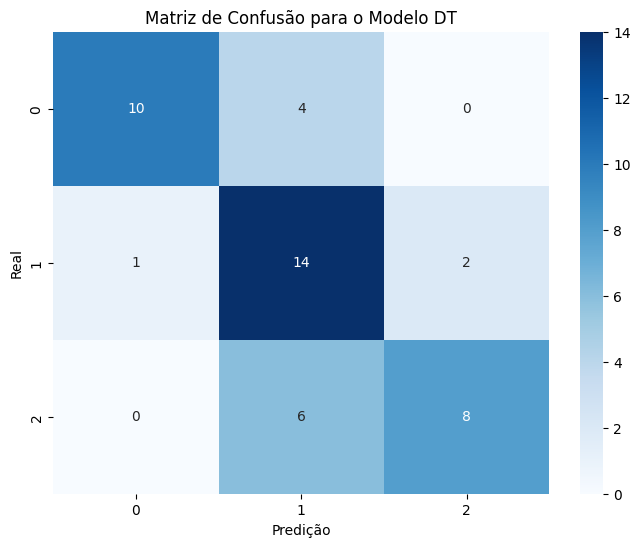

Acurácia do modelo: 0.711


In [89]:
# IV. Matriz de confusão do modelo escolhido.

import numpy as np

r = DecisionTreeClassifier(random_state=42, criterion='log_loss', min_samples_leaf=20, max_depth=5)
r.fit(x_train, y_train)
y_pred = r.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão para o Modelo DT')
plt.show()

acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {acuracia:.3f}')

In [ ]:
# V. Matrix de confusão mostra diagonal com valores consistentemente mais altos. Isso significa que não há bias para detectar somente uma das classes.
# Classe com detecção mais fraca é a 2. Classes 1 e 0 com detecção forte.


# VI. opine que variáveis poderiam ser omitidas na criação do modelo sem que a acurácia fosse essencialmente prejudicada?
# Resposta: Todas, exceto Education, Income, Civil.


In [90]:
# VII. Caso tenha respondido na questão anterior que alguma variável poderia ser omitida, refaça os itens i. ii. e iii. Houve diferença perceptível na acurácia?

# Acurácia da DT não foi prejudicada.
# Acurácia da RF foi prejudicada. Com menos variáveis para criar árvores diferentes o algoritmo foi prejudicado.
# LDA/QDA quase não houve alteração.

# Separar os dados em treinamento e teste
x = df1[['Education', 'Income', 'Civil']]
y = df1['faixa_etaria']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Escalonar os dados para LDA e QDA
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

print(dt_best(x_train, y_train, x_test, y_test))
print(rf_best(x_train, y_train, x_test, y_test))
print(lda_best(x_train_scaled, y_train, x_test_scaled, y_test))

{'criterion': 'gini', 'acuracia': 0.7111111111111111, 'max_depth': 5, 'min_samples_leaf': 0, 'min_sample_leaf': 10}
{'criterion': 'gini', 'acuracia': 0.6222222222222222, 'n_estimators': 10, 'max_depth': 5, 'min_samples_leaf': 0, 'min_sample_leaf': 2}
{'type': 'qda', 'acuracia': 0.6}


In [91]:
# Iniciando Exercício 2

# I. Transforme a variável CountryOrigin em 3 dummies indicando se a origem é “UnitedStates” ou “UnitedKingdom” ou qualquer outro valor.
df2['OriginCountry'] = df2.apply(lambda row: 1 if row['OriginCountry'] == 'UnitedStates' else (2 if row['OriginCountry'] == 'UnitedKingdom' else 3), axis=1)
print(df2['OriginCountry'].value_counts())

OriginCountry
3    67328
1    39807
2    22320
Name: count, dtype: int64


In [92]:
percent_null = df2.isnull().mean() * 100
print(percent_null)

Aircraft               71.864354
AirlineName             0.000000
CabinType               2.331312
DateFlown              29.710710
DatePub                 0.000000
EntertainmentRating     0.000000
FoodRating              0.000000
GroundServiceRating     0.000000
OriginCountry           0.000000
OverallScore            3.345564
Recommended             0.000000
Review                  0.636515
Route                  29.840485
SeatComfortRating       0.000000
ServiceRating           0.000000
Slug                    0.000000
Title                   0.003090
TravelType             29.592522
TripVerified           54.031903
ValueRating             0.000000
WifiRating              0.000000
unique_id               0.000000
dtype: float64


In [94]:
# II. Retire do modelo qualquer coluna que tenha mais de 10% de valores nulos.
threshold = len(df2) * 0.9
df2 = df2.dropna(axis=1, thresh=threshold)

In [96]:
#resultado
percent_null = df2.isnull().mean() * 100
print(percent_null)

AirlineName            0.000000
CabinType              2.331312
DatePub                0.000000
EntertainmentRating    0.000000
FoodRating             0.000000
GroundServiceRating    0.000000
OriginCountry          0.000000
OverallScore           3.345564
Recommended            0.000000
Review                 0.636515
SeatComfortRating      0.000000
ServiceRating          0.000000
Slug                   0.000000
Title                  0.003090
ValueRating            0.000000
WifiRating             0.000000
unique_id              0.000000
dtype: float64


In [97]:
df2.dropna(inplace=True)

In [98]:
# III. Transforme o OveralScore de uma escala de 1 à 10 em uma escala de 1 à 5, arredondando sem casas decimais.

df2['OverallScore'] = df2['OverallScore'].apply(lambda x: max(1, round(x / 2)))

In [99]:
print(df2['OverallScore'].value_counts())

OverallScore
1    55013
4    31381
2    17164
5    14314
3     4358
Name: count, dtype: int64


In [103]:
# IV. Descarte qualquer outra coluna da tabela que não tenha sido citada.
columns = [
    'CabinType',
    'FoodRating',
    'GroundServiceRating',
    'OriginCountry',
    'EntertainmentRating',
    'OverallScore',
    'Recommended',
    'ValueRating',
    'ServiceRating',
    'SeatComfortRating',
]
df2 = df2[columns]

In [104]:
print(df2['CabinType'].value_counts())

CabinType
Economy Class      98924
Business Class     16206
Premium Economy     4731
First Class         2369
Name: count, dtype: int64


In [106]:
#aqui estou fazendo a alteração necessária para não deixar em string e pegar o dado mais relevante
df2['Economy Class'] = df2.apply(lambda row: 1 if row['CabinType'] == 'Economy Class' else 0, axis=1)
df2['Business Class'] = df2.apply(lambda row: 1 if row['CabinType'] == 'Business Class' else 0, axis=1)
df2['Premium Economy'] = df2.apply(lambda row: 1 if row['CabinType'] == 'Premium Economy' else 0, axis=1)
df2['First Class'] = df2.apply(lambda row: 1 if row['CabinType'] == 'First Class' else 0, axis=1)
df2['Recommended'] = df2.apply(lambda row: 1 if row['Recommended'] == 'yes' else 0, axis=1)
del df2['CabinType']


,FoodRating,GroundServiceRating,OriginCountry,EntertainmentRating,OverallScore,Recommended,ValueRating,ServiceRating,SeatComfortRating,Economy Class,Business Class,Premium Economy,First Class
0,4,4,3,0,4,1,3,5,4,1,0,0,0
1,1,1,2,0,1,0,2,2,2,1,0,0,0
2,1,1,2,0,1,0,2,1,2,1,0,0,0


In [107]:
df2.head(10)

,FoodRating,GroundServiceRating,OriginCountry,EntertainmentRating,OverallScore,Recommended,ValueRating,ServiceRating,SeatComfortRating,Economy Class,Business Class,Premium Economy,First Class
0,4,4,3,0,4,1,3,5,4,1,0,0,0
1,1,1,2,0,1,0,2,2,2,1,0,0,0
2,1,1,2,0,1,0,2,1,2,1,0,0,0
3,0,0,3,0,4,1,4,0,0,1,0,0,0
6,1,1,3,0,1,0,1,3,1,1,0,0,0
7,0,5,3,0,4,1,4,4,4,1,0,0,0
8,0,5,3,0,4,1,4,5,4,1,0,0,0
9,0,3,3,0,4,1,3,2,4,1,0,0,0
10,0,1,3,0,1,0,1,1,1,1,0,0,0
11,1,1,3,1,1,0,1,1,1,1,0,0,0


In [108]:
# VI. O modelo preditivo deve ser DT, RF, LDA ou QDA. Determine o melhor modelo baseando-se na acurácia.
x = df2.drop('OverallScore', axis='columns')
y = df2['OverallScore']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

print(dt_best(x_train, y_train, x_test, y_test))
print(rf_best(x_train, y_train, x_test, y_test))
print(lda_best(x_train_scaled, y_train, x_test_scaled, y_test))

# DT e RF tem acurácias extremamente próximas. Escolhi DT pois, em uma situação
# de virtual empate, o melhor é escolher o modelo computacionalmente mais simples


{'criterion': 'log_loss', 'acuracia': 0.7812684076182996, 'max_depth': 10, 'min_samples_leaf': 0, 'min_sample_leaf': 20}
{'criterion': 'gini', 'acuracia': 0.7851299168793769, 'n_estimators': 50, 'max_depth': 20, 'min_samples_leaf': 0, 'min_sample_leaf': 20}
{'type': 'lsqr', 'acuracia': 0.7420969958766935}


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


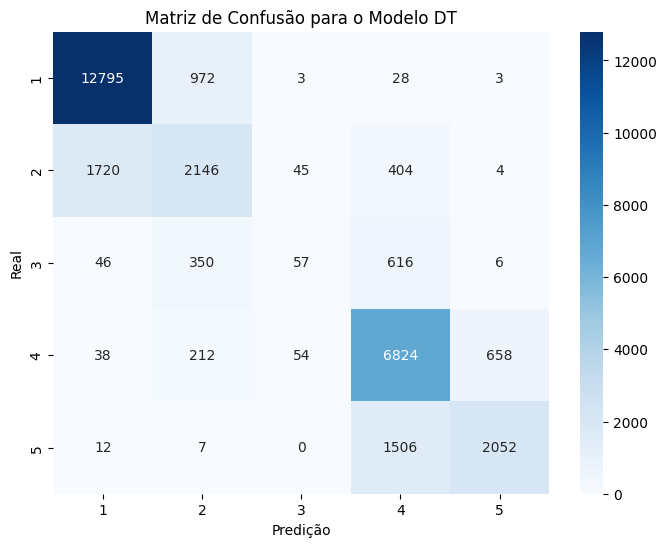

Acurácia do modelo: 0.781


In [109]:
# VII. Matriz de confusão do modelo escolhido.
# VIII. Responsa descritiva: explicação do que foi possível determinar a partir da matriz de confusão obtida.

import numpy as np

r = DecisionTreeClassifier(random_state=42, criterion='log_loss', min_samples_leaf=20, max_depth=10)
r.fit(x_train, y_train)
y_pred = r.predict(x_test)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão para o Modelo DT')
plt.show()

# Exibir a acurácia
acuracia = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {acuracia:.3f}')

# Há bastante dificuldade do modelo em detectar a Classe 3.
# Isso pode ocorrer devido a baixa quantidade de amostras da classe 3 em comparação com o
# restante do dataset. Uma possível correção é balancear a amostra, tornando iguais as
# quantidades de registros das diferentes classes.
# Fica evidente também que o modelo, ainda que erre, concentra seus erros em classes próximas
# Isso pode ocorrer pois a nota, além de uma classe, é também uma informação ordenável.

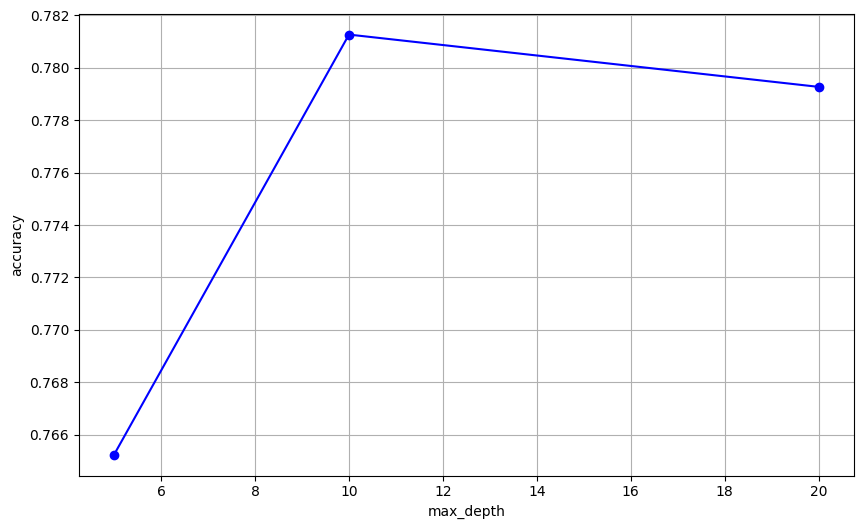

In [110]:
# IX. Se o melhor modelo for uma DT, criar um gráfico de linha mostrando a evolução da acurácia em função do max_depth.

accuracy = []
max_depth_values = [5, 10, 20]

for depth in max_depth_values:
  r = DecisionTreeClassifier(random_state=42, criterion='log_loss', min_samples_leaf=20, max_depth=depth)
  r.fit(x_train, y_train)
  y_pred = r.predict(x_test)
  accuracy.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, accuracy, marker='o', linestyle='-', color='b')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.grid(True)
plt.show()


In [112]:
x = df2[['FoodRating', 'EntertainmentRating', 'ValueRating', 'ServiceRating', 'SeatComfortRating']]
y = df2['OverallScore']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

print(dt_best(x_train, y_train, x_test, y_test))
print(rf_best(x_train, y_train, x_test, y_test))
print(lda_best(x_train_scaled, y_train, x_test_scaled, y_test))

# XI. Execute novamente o item vi. dessa vez utilizando somente as variáveis FoodRating, EntertainmentRate, ValueRating, ServiceRating e SeatComfortRating. Houve melhoria perceptível na acurácia?
# Resposta: Houve pequeno prejuízo na acurácia de todos os modelos, provavelmente variáveis com importância marginal foram retiradas.

{'criterion': 'gini', 'acuracia': 0.7582302506708555, 'max_depth': 10, 'min_samples_leaf': 0, 'min_sample_leaf': 20}
{'criterion': 'log_loss', 'acuracia': 0.7605537011584528, 'n_estimators': 10, 'max_depth': 10, 'min_samples_leaf': 0, 'min_sample_leaf': 10}
{'type': 'svd', 'acuracia': 0.7337522089141959}
